                                     CLAIMS ANALYSIS: OPTIMIZATION OF RISK & REVENUE IN AUTO INSURANCE

INSIGHTS FROM THE DATA:

        * Finding 1 - Grouped calims by vehicle class. Luxury vehicles = Associated with higher claims (3x more than sedan/sports car). We need to re-check our premium. Are we charging them enough as it's more likely to affect the company's profitability.
        
        * Finding 2 - GEOGRAPHIC RISK - IDENTIFY HIGH COST REGIONS: Nevada has the highest severity per major incident, but the cost variance across states is minimal, suggesting a consistent pricing model across West coast (USA).
        
        * Finding 3 - REVENUE ATTRIBUTION BY CHANNEL: Interestingly, traditional channels - AGENTS/BRANCH bring in more rvenue & more volume (> 60%) than digital channels.
        
        * Finding 4 - PROFITABILITY DRIVER - EDUCATION DISCOUNT: There's DIRECT CORRELATION b/w education lvl & claims - claim cost declines as education level increases - i.e., more educated policyholders may be more responsible or lower-risk
        
        * Finding 5 - Identified Most Valuable Customers. They generate 100% profit margin but claim very less. We could offer these segments RETENTION OFFERS, so we don't lose them to a competitor.

        * Finding 6 - DEMOGRAPHIC VALIDATION & PRICING STRATEGY: Men have higher claims than women. We could consider premium pricing strategies based on gender.

In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\Waseem khan\Downloads\archive (3)\AutoInsurance.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,10/2/2011,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,12/2/2011,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,6/2/2011,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,3/2/2011,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [2]:
df.rename(columns= {'Vehicle Class':'vehicle_class', 'Vehicle Size':'vehicle_size', 'Sales Channel':'sales_channel'}, inplace= True)
df.rename(columns= {'Total Claim Amount':'claim_amount', 'Policy Type':'policy_type', 'Renew Offer Type':'renew_offer'},inplace= True)
df.rename(columns= {'Number of Policies':'no_of_policies', 'Number of Open Complaints':'open_complaints', 'Location Code':'loc_code'}, inplace= True)
df.rename(columns= {'Marital Status':'marital_stats', 'Months Since Policy Inception':'policy_age_months'}, inplace=True)
df.rename(columns= {'Months Since Last Claim':'claim_gap_months', 'Customer Lifetime Value':'cust_lfv'}, inplace=True)
df.rename(columns= {'State':'state','Response':'response','Coverage':'coverage','Education':'education'}, inplace=True)
df.rename(columns= {'Gender':'gender','Income':'income', 'EmploymentStatus':'emp_stats', 'Policy':'policy'}, inplace=True)

In [3]:
df['claim_amount']=df['claim_amount'].round().astype(int)

In [4]:
import sqlite3
conn = sqlite3.connect(':memory:')
df.to_sql('my_table', conn, index=False, if_exists='replace')

9134

In [9]:
df

,Customer,state,cust_lfv,response,coverage,education,Effective To Date,emp_stats,gender,income,...,policy_age_months,open_complaints,no_of_policies,policy_type,policy,renew_offer,sales_channel,claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,385,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,530,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,10/2/2011,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,12/2/2011,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,6/2/2011,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,791,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,3/2/2011,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691,Four-Door Car,Large


C:\Users\Waseem khan\AppData\Local\Temp\ipykernel_10888\991668380.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_result, x='avg_claim_value', y='vehicle_class', palette='muted')


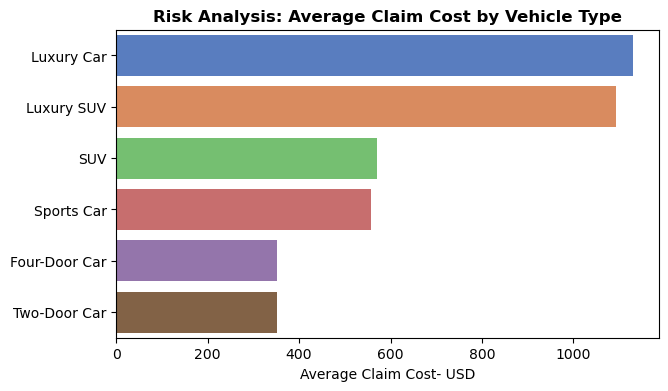

In [54]:
# VEHICLE CLASS THAT COSTS THE COMPANY THE MOST MONEY

query="""
select vehicle_class, count (*) as total_claims, round(avg(claim_amount),0) as avg_claim_value from my_table
group by vehicle_class
order by avg_claim_value desc
"""

df_result= pd.read_sql_query(query,conn)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
sns.barplot(data=df_result, x='avg_claim_value', y='vehicle_class', palette='muted')

plt.title('Risk Analysis: Average Claim Cost by Vehicle Type', weight='bold')
plt.xlabel('Average Claim Cost- USD')
plt.ylabel('')
plt.show()

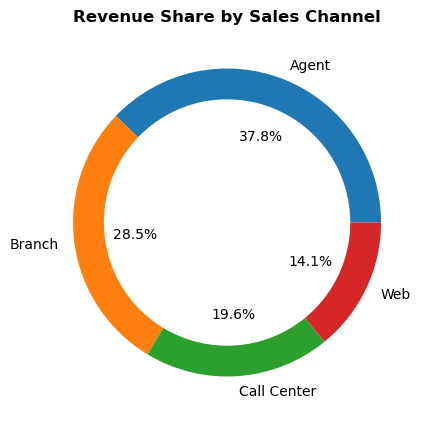

In [72]:

channel_data = df.groupby('sales_channel')['cust_lfv'].sum()

plt.figure(figsize=(7, 5))

plt.pie(channel_data, labels=channel_data.index, autopct='%1.1f%%', wedgeprops={'width': 0.2}) 

plt.title('Revenue Share by Sales Channel', weight='bold')
plt.show()

In [6]:
# REGIONAL SEVERITY - STATES GENERATING HIGHER THAN AVG INSURANCE CLAIMS

query="""
select state, round(avg(claim_amount),0) as avg_claims_value from my_table 
where claim_amount > (select avg(claim_amount) from my_table)
group by state
order by avg_claims_value desc
"""
result= pd.read_sql_query(query,conn)
print(result)

        state  avg_claims_value
0      Nevada             685.0
1  Washington             681.0
2  California             681.0
3      Oregon             674.0
4     Arizona             664.0


In [17]:
# TARGET MARKET IDENTIFICATION - HIGH STABILITY, LOW RISK CUSTOMERS

query="""
select customer, state, emp_stats, claim_amount from my_table
where emp_stats = 'Employed' and claim_amount < 200
order by claim_amount
"""
result= pd.read_sql_query(query,conn)
print(result)

     Customer       state emp_stats  claim_amount
0     PN21042     Arizona  Employed             0
1     EY74093      Nevada  Employed             0
2     IS30186  California  Employed             0
3     FB84409     Arizona  Employed             1
4     VB53090  California  Employed             1
...       ...         ...       ...           ...
1521  UU70820     Arizona  Employed           199
1522  MR46875  Washington  Employed           199
1523  BQ28323      Oregon  Employed           199
1524  VG68427     Arizona  Employed           199
1525  LQ22609     Arizona  Employed           199

[1526 rows x 4 columns]


In [20]:
# CHANNEL EFFICACY: REVENUE CONTRIBUTION BY SALES TOUCHPOINT (TRADITIONAL VS DIGITAL)

query="""
select sales_channel, count(no_of_policies) as policy_count, round(sum(cust_lfv),0) as lifetime_value from my_table
group by sales_channel
order by lifetime_value desc
"""
result= pd.read_sql_query(query,conn)
print(result)

  sales_channel  policy_count  lifetime_value
0         Agent          3477      27668955.0
1        Branch          2567      20843300.0
2   Call Center          1765      14296651.0
3           Web          1325      10308219.0


In [48]:
# MOST VALUABLE CUSTOMERS IN EACH LOCATION

query="""
select * from
(select customer, loc_code, income, round(cust_lfv,0) as lifetime_value, RANK() OVER (PARTITION BY loc_code ORDER BY cust_lfv DESC) AS ranked
from my_table) AS wealthy_clients
where ranked <= 3;

"""
result= pd.read_sql_query(query,conn)
print(result)

  customer  loc_code  income  lifetime_value  ranked
0  KH55886     Rural   78310         67907.0       1
1  OM82309     Rural   61321         58167.0       2
2  KI58952     Rural   72794         51338.0       3
3  FQ61281  Suburban   58958         83325.0       1
4  YC54142  Suburban       0         74229.0       2
5  BP23267  Suburban   39547         73226.0       3
6  AH58807     Urban   84650         51426.0       1
7  LW64678     Urban   25167         51016.0       2
8  QT84069     Urban   82081         50568.0       3


In [29]:
df.rename(columns={'Monthly Premium Auto':'monthly_premium'}, inplace=True)

In [37]:
# DEMOGRAPHIC RISK SEVERITY: GENDER BASED CLAIM SEVERITY

query="""
select gender, count(*) as total_customers, round(avg(claim_amount),0) as avg_claims_value from my_table
group by gender order by avg_claims_value desc
"""
result= pd.read_sql_query(query,conn)
print(result)

  gender  total_customers  avg_claims_value
0      M             4476             456.0
1      F             4658             413.0


In [69]:
# THE AVG CLAIM COST BY VEHICLE SIZE

query="""
select "vehicle_size", count(*) as Policies_Sold, round(avg("claim_amount"), 0) as Avg_Claim_Cost
from my_table
group by "vehicle_size"
order by Avg_Claim_Cost desc
"""
result= pd.read_sql_query(query,conn)
print(result)

  vehicle_size  Policies_Sold  Avg_Claim_Cost
0        Small           1764           489.0
1        Large            946           426.0
2      Medsize           6424           420.0


In [74]:
# MORE EDUCATED CUSY=TOMERS TEND TO FILE LOWER CLAIMS

uery="""
select education, count(*) as total_customer, round(avg(claim_amount),0) as avg_claim_cost from my_table 
group by education order by avg_claim_cost desc
"""
result= pd.read_sql_query(query,conn)
print(result)

              education  total_customer  avg_claim_cost
0  High School or Below            2622           487.0
1              Bachelor            2748           428.0
2               College            2681           424.0
3                Master             741           350.0
4                Doctor             342           338.0


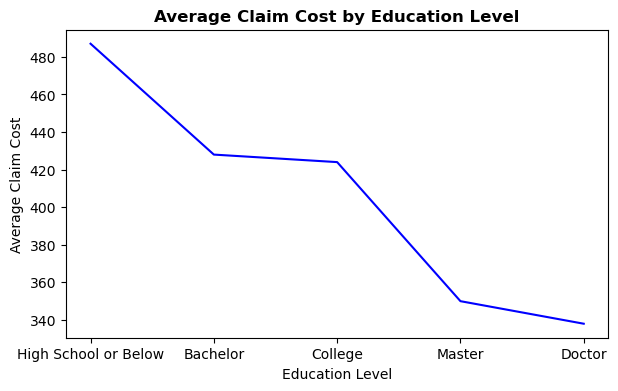

In [80]:
# HIGHER EDUCATION LEVEL == LOWER CLAIMS

plt.figure(figsize=(7,4))
plt.plot(result['education'], result['avg_claim_cost'], color='blue')
plt.title('Average Claim Cost by Education Level', fontweight='bold')
plt.xlabel('Education Level')
plt.ylabel('Average Claim Cost')

plt.show()
